In [17]:
import awkward as ak
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import hist
from hist import Hist

hep.style.use("CMS")
palette = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

In [18]:
MC_dict = {}
processes = ['GluGluSpin0To2G_W-0p014_M-1000','GluGluSpin0To2G_W-0p014_M-1250','GluGluSpin0To2G_W-0p014_M-1500','GluGluSpin0To2G_W-0p014_M-5000']
for process in processes:
    MC_dict[f'{process}_arr'] = ak.from_parquet(f'02_NTuples/{process}/')

In [19]:
print(MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].fields)

['lead_seediEtaOriX', 'lead_cutBased', 'lead_electronVeto', 'lead_hasConversionTracks', 'lead_isScEtaEB', 'lead_isScEtaEE', 'lead_mvaID_WP80', 'lead_mvaID_WP90', 'lead_pixelSeed', 'lead_seedGain', 'lead_electronIdx', 'lead_jetIdx', 'lead_seediPhiOriY', 'lead_vidNestedWPBitmap', 'lead_ecalPFClusterIso', 'lead_energyErr', 'lead_energyRaw', 'lead_esEffSigmaRR', 'lead_esEnergyOverRawE', 'lead_eta', 'lead_etaWidth', 'lead_haloTaggerMVAVal', 'lead_hcalPFClusterIso', 'lead_hoe', 'lead_hoe_PUcorr', 'lead_mvaID', 'lead_pfChargedIso', 'lead_pfChargedIsoPFPV', 'lead_pfChargedIsoWorstVtx', 'lead_pfPhoIso03', 'lead_pfRelIso03_all_quadratic', 'lead_pfRelIso03_chg_quadratic', 'lead_phi', 'lead_phiWidth', 'lead_pt', 'lead_r9', 'lead_s4', 'lead_sieie', 'lead_sieip', 'lead_sipip', 'lead_superclusterEta', 'lead_trkSumPtHollowConeDR03', 'lead_trkSumPtSolidConeDR04', 'lead_x_calo', 'lead_y_calo', 'lead_z_calo', 'lead_genPartFlav', 'lead_genPartIdx', 'lead_electronIdxG', 'lead_genPartIdxG', 'lead_jetIdxG', 

In [20]:
diphotons = MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr']
EB_photons = diphotons[diphotons.lead_isScEtaEB & diphotons.sublead_isScEtaEB]

EE_photons = MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'][MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].lead_isScEtaEE & MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].sublead_isScEtaEE]

EB_photons = EB_photons[ak.num(EB_photons.pt) >0]
EE_photons = EE_photons[ak.num(EE_photons.pt) >0]
lead_photon_pt = MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].lead_pt
sublead_photon_pt = MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].sublead_pt
print(ak.num(EB_photons.pt)[:10])
# EB_lead_photon_pt = lead_photon_pt[MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].lead_isScEtaEB]
# EB_sublead_photon_pt = sublead_photon_pt[MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].sublead_isScEtaEB]


[1, 1, 1, 1, 1, 1, 1, 3, 1, 1]


In [21]:
# print(ak.to_list(MC_dict['GluGluSpin0To2G_W-0p014_M-5000_arr'].lead_pt[:13]),"\n")
print(ak.to_list(EB_photons.lead_pt[:13]),"\n")
print(type(EB_photons),"\n")
# EB_photons = EB_photons[ak.num(EB_photons, axis=0) > 1]
EB_photons_lead_pt = ak.firsts(EB_photons.lead_pt)
EB_photons_sublead_pt = ak.firsts(EB_photons.sublead_pt)
EE_photons_lead_pt = ak.firsts(EE_photons.lead_pt)
EE_photons_sublead_pt = ak.firsts(EE_photons.sublead_pt)
# EE_photons = ak.firsts(EE_photons)
print(ak.to_list(EB_photons_lead_pt[:13]),"\n")
print(len(EB_photons_lead_pt),"\n")

[[443.3908386230469], [254.51437377929688], [1890.7926025390625], [1671.1663818359375], [151.6139373779297], [135.4404296875], [1929.73193359375], [2068.765380859375, 2068.765380859375, 2023.77197265625], [1024.4566650390625], [2407.591064453125], [2546.060546875], [859.9962158203125], [146.29945373535156]] 

<class 'awkward.highlevel.Array'> 

[443.3908386230469, 254.51437377929688, 1890.7926025390625, 1671.1663818359375, 151.6139373779297, 135.4404296875, 1929.73193359375, 2068.765380859375, 1024.4566650390625, 2407.591064453125, 2546.060546875, 859.9962158203125, 146.29945373535156] 

72135 



In [22]:
print("EB photons")
print(ak.to_list(EB_photons.lead_pt[:13]),"\n")
print(ak.to_list(EB_photons.sublead_pt[:13]),"\n")
print(ak.to_list(EE_photons.lead_pt[:50]),"\n")
print(ak.to_list(EE_photons.sublead_pt[:50]),"\n")
print("number of EB photons: ", len(EB_photons.lead_pt))
print("number of EB photons: ", len(EB_photons.sublead_pt))
print("number of EE photons: ", len(EE_photons.lead_pt))
print("number of EE photons: ", len(EE_photons.sublead_pt))

EB photons
[[443.3908386230469], [254.51437377929688], [1890.7926025390625], [1671.1663818359375], [151.6139373779297], [135.4404296875], [1929.73193359375], [2068.765380859375, 2068.765380859375, 2023.77197265625], [1024.4566650390625], [2407.591064453125], [2546.060546875], [859.9962158203125], [146.29945373535156]] 

[[434.5292663574219], [221.93597412109375], [1848.1693115234375], [1651.1337890625], [149.29150390625], [96.28170776367188], [1894.0867919921875], [2023.77197265625, 23.44895362854004, 23.44895362854004], [302.05096435546875], [2367.13623046875], [2227.5517578125], [255.13067626953125], [107.84111022949219]] 

[[545.2998657226562], [870.392578125], [96.20286560058594], [958.3392944335938], [358.19195556640625], [308.1558532714844], [866.4034423828125], [613.1732788085938], [19.271879196166992], [97.42019653320312], [33.25354766845703], [124.91017150878906], [511.4666748046875, 511.4666748046875, 388.5142822265625], [247.67137145996094], [93.52584838867188], [27.77821159

In [23]:
n_bins = 40
x_low = 0
x_high = 5000
binning = np.linspace(x_low, x_high, n_bins + 1)
width = binning[1] - binning[0]
center = (binning[:-1] + binning[1:]) / 2

/tmp/hhsieh/ipykernel_1992315/911503913.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0,top = 1e6)


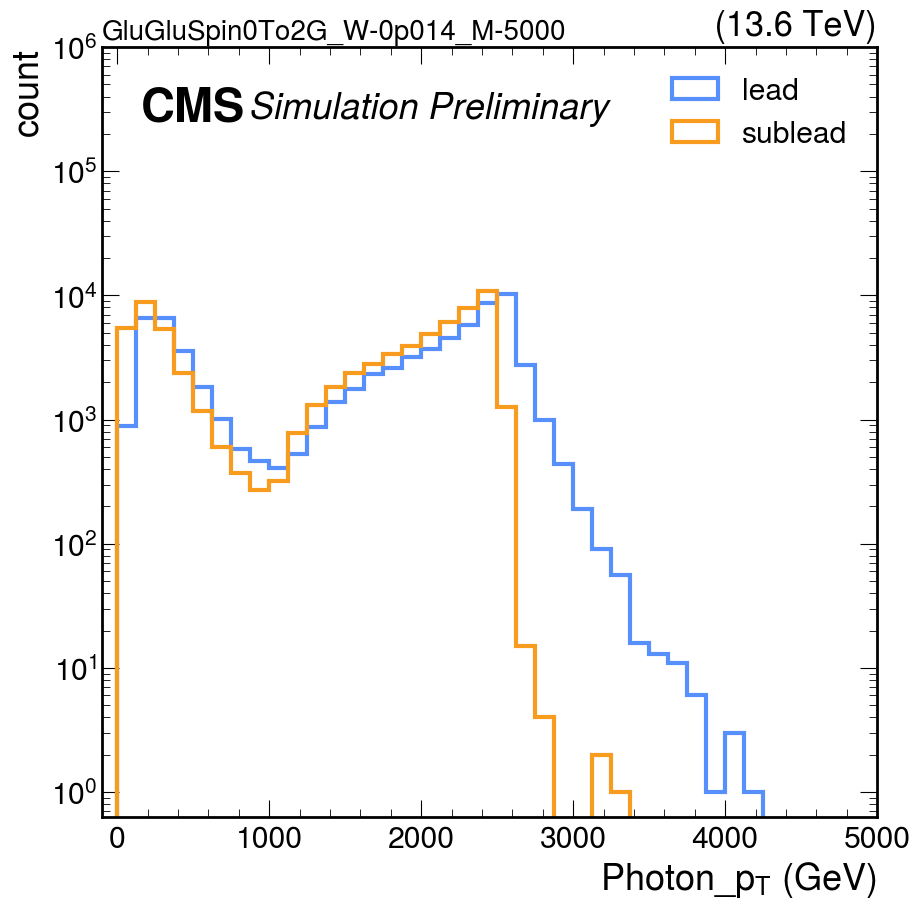

In [25]:
EB_lead_photon_pt_hist = np.histogram(EB_photons_lead_pt, bins=binning)[0]
EB_sublead_photon_pt_hist = np.histogram(EB_photons_sublead_pt, bins=binning)[0]


plt.hist(center, bins=binning, weights=EB_lead_photon_pt_hist, histtype='step', label='lead', linewidth=3)
plt.hist(center, bins=binning, weights=EB_sublead_photon_pt_hist, histtype='step', label='sublead', linewidth=3)

hep.cms.label("Preliminary",loc=1,com=13.6)
plt.yscale('log')
plt.xlabel('Photon_$p_T$ (GeV)')
plt.ylabel('count')
plt.legend()
plt.xlim(x_low-100, x_high)
plt.ylim(bottom=0,top = 1e6)
plt.title('GluGluSpin0To2G_W-0p014_M-5000',fontsize=20, loc = 'left')
# plt.savefig()
plt.show()